## Project 1 for Unsupervised Learning

*Please find below the Project 1 for Unsupervised Learning course.*

### Overview:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points

3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

## Problem Statement 

The data set was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multi-valued discrete and 4 continuous variables.

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multi-valued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Acceleration – continuous

Yr – Model of the car – Multivalued discrete

Mpg - Miles per gallon - continuous

## Dataset 

car-dataset.csv

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read the given Data

In [2]:
cars = pd.read_csv('Data/cars-dataset.csv')

## 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [3]:
cars.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [4]:
cars.isnull().any()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [5]:
cars.isna().any()

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### Variable hp is of object type. Lets first find if all values are numeric

In [7]:
cars.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

#### There are few rows with hp = ?. Lets see them and get their count

In [8]:
cars.loc[cars['hp'] == '?', 'hp'].count()

6

In [9]:
cars.loc[cars['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


#### First coverting hp column to numeric and then getting their mean value

In [10]:
cars.loc[cars['hp'] != '?', 'hp'] = pd.to_numeric(cars.loc[cars['hp'] != '?', 'hp'])

In [11]:
mean_hp = round(cars.loc[cars['hp'] != '?', 'hp'].mean())
mean_hp

104.0

#### Assigning this mean value to all those rows having ? value

In [12]:
cars.loc[cars['hp'] == '?', 'hp'] = mean_hp

#### Converting the hp column values to integer (hp cannot be in float)

In [13]:
cars['hp'] = cars['hp'].astype('int64')

#### Checking if have coverted all values and can proceed with further analysis

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [15]:
cars.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


Before plotting the curves, scaling all the continuous variables

In [16]:
cars_sc = cars[['disp', 'hp', 'wt', 'acc', 'mpg']]

In [17]:
sc = StandardScaler()

In [18]:
cars_sc = pd.DataFrame(sc.fit_transform(cars_sc), columns=cars_sc.columns)

Adding cyl and yr for EDA

In [19]:
cars_sc['cyl'] = cars['cyl']
cars_sc['yr'] = cars['yr']

In [20]:
cars_sc.corr()

,disp,hp,wt,acc,mpg,cyl,yr
disp,1.000000,0.893760,0.932824,-0.543684,-0.804203,0.950721,-0.370164
hp,0.893760,1.000000,0.860676,-0.684376,-0.771543,0.839061,-0.411750
wt,0.932824,0.860676,1.000000,-0.417457,-0.831741,0.896017,-0.306564
acc,-0.543684,-0.684376,-0.417457,1.000000,0.420289,-0.505419,0.288137
mpg,-0.804203,-0.771543,-0.831741,0.420289,1.000000,-0.775396,0.579267
cyl,0.950721,0.839061,0.896017,-0.505419,-0.775396,1.000000,-0.348746
yr,-0.370164,-0.411750,-0.306564,0.288137,0.579267,-0.348746,1.000000


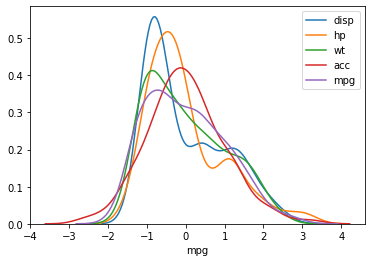

In [21]:
sns.distplot(cars_sc.disp, label='disp', hist=False)
sns.distplot(cars_sc.hp, label='hp', hist=False)
sns.distplot(cars_sc.wt, label='wt', hist=False)
sns.distplot(cars_sc.acc, label='acc', hist=False)
sns.distplot(cars_sc.mpg, label='mpg', hist=False)

#### Based on the distribution plot:
- All of continuous variables are right-skewed
- acc seems almost perfectly normally distributed
- disp, wt, hp, mpg seems to have more than one peak on the distribution plot; These can be good contributors for the clusters

#### Let's draw boxplots against the multivariate nominal variables, cyl and yr

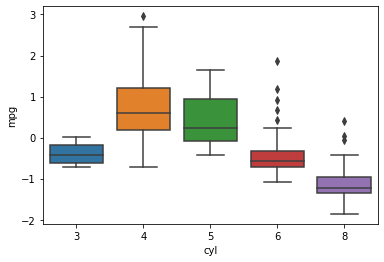

In [22]:
sns.boxplot(x=cars_sc.cyl, y=cars_sc.mpg)

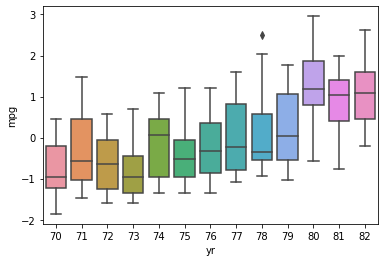

In [23]:
sns.boxplot(x=cars_sc.yr, y=cars_sc.mpg)

#### Based on the above boxplot:
- There is positive correaltion of mpg and year of manufacturing i.e. the mpg increases over a period of time
- Except for 3 number of cylinders, there is negative correlation of mpg and number of cylinders

## 2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points

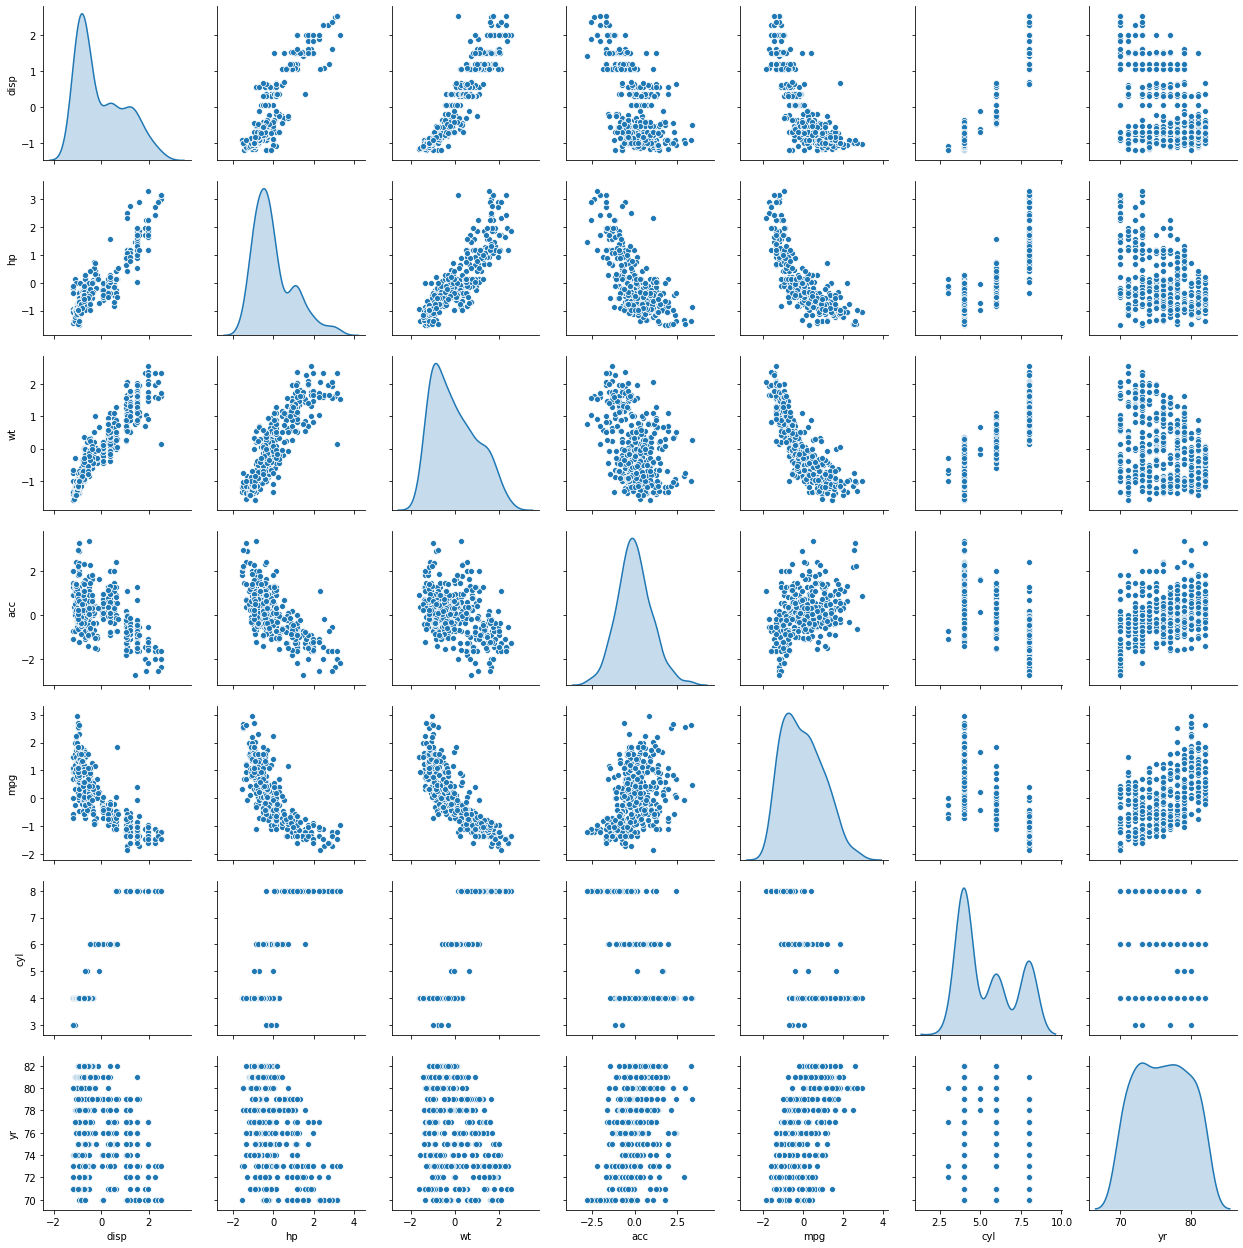

In [24]:
sns.pairplot(data=cars_sc, diag_kind='kde')

#### Inferences on Correlation from scatter plots and distribution:
- High correlation between number of cyliders and disp, hp and wt
- In fact, all of them, cyl, disp, hp and wt are strongly correlated to each other
- mpg is having negative correlation with number of cylinders, disp, hp and wt
- mpg is having positive correlation with acc 

#### Inferences on Clusters from distribution:
- The distributions of cyl, disp and hp are showing at least 3 clusters
- The distributions of wt, yr and mpg are showing at least 2 clusters

### Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

### NOTE: (Clustering with multi-nominal and continuous data seems to be a research area)
- cyl and disp have strong postive correaltion between the two (0.95). More cyl means more disp. 
- So, it's ok to consider only one of them for clustering.
- Moreover, cyl is a multi-nomial variable and disp is a continuous variable
- We will use only disp in the clustering (and omit cyl) and will aid in linear regression modeling
- We will also remove yr and do the clustering with only continuous data

Removing variables cyl and yr which were added for EDA

In [25]:
cars_sc.drop(columns=['cyl','yr'], axis=1, inplace=True)

In [26]:
cluster_error = []
cluster_range = range (1, 10)

In [27]:
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(cars_sc)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_error.append(clusters.inertia_)
  
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_error})

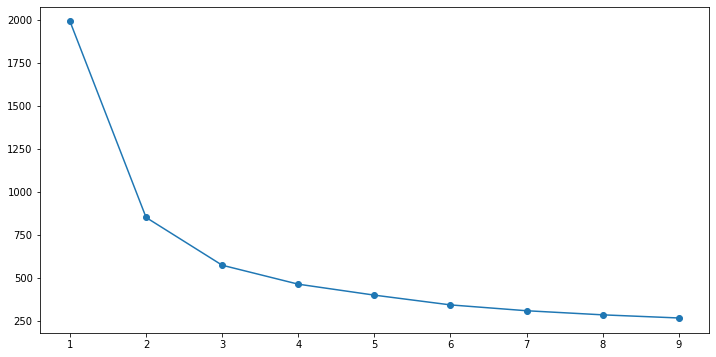

In [28]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Inference from the Elbow curve:
- One cluster gives maximum cluster error (which is obvious)
- The cluster error decreases with increase in number of clusters
- The clustur error decreases sharply upto clustr 3
- Beyond 3 clustures, the cluster error decreases but not significantly

#### So, we will go with 3 clusters and check if they are balanced or not

In [29]:
clusters = KMeans(3, n_init = 5)
clusters.fit(cars_sc)
centroids = clusters.cluster_centers_

In [30]:
centroids_df = pd.DataFrame(centroids, columns=cars_sc.columns)
centroids_df

,disp,hp,wt,acc,mpg
0,1.484507,1.503014,1.387534,-1.062679,-1.151105
1,-0.091721,-0.158624,0.028399,0.251314,-0.296167
2,-0.867649,-0.812267,-0.925860,0.434210,1.042522


In [31]:
cars_sc['labels'] = clusters.labels_

In [32]:
cars_sc.groupby('labels').count()

,disp,hp,wt,acc,mpg
labels,,,,,
0,97,97,97,97,97
1,151,151,151,151,151
2,150,150,150,150,150


### The data points in 3 clusters are ranging from 97 to 151, which seems fair in the given dataset and can be an optimal solution. Have checked with 2 and 4 clusters but they are more imbalance than 3 clusters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C739E4EF60>,
      dtype=object)

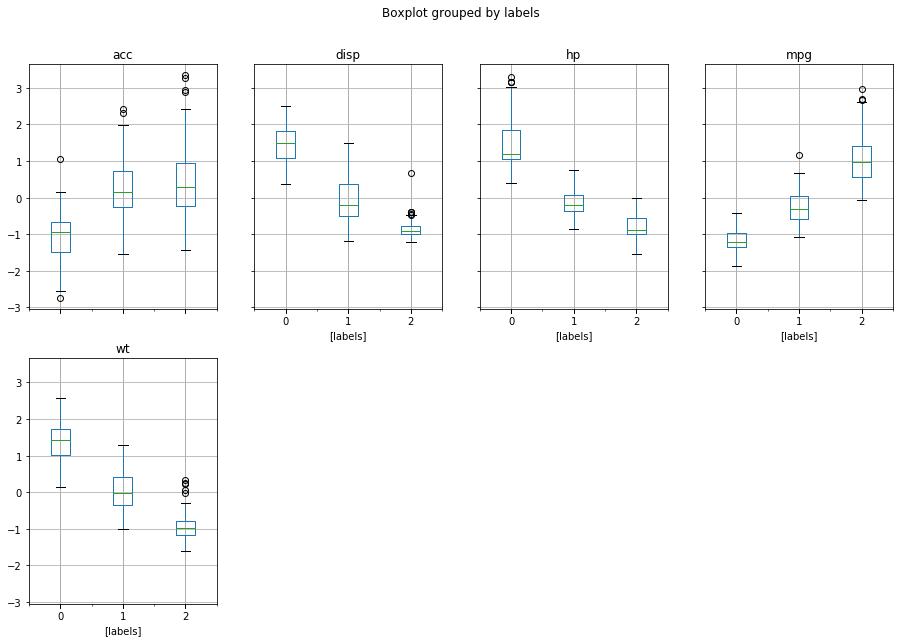

In [33]:
cars_sc.boxplot(by='labels', layout=(2, 4), figsize=(15, 10))

#### Based on above boxplots for 3 clusters:
- The nature of dataset doesn't produce clearly differntiable clusters; however 3 clusters seems an optimal solution
- The boxplot of disp, hp, mpg and wt show differtiable clusters. This was also evident from the EDA (distribution plot) above
- The boxplot of acc variables doesn't differentiable clusters. This was also evident from the normal distribution plot of acc as shown in EDA above


- For Cluster 0: Higher (disp, hp, wt) and Lower (mpg, acc)
- For Cluster 1: Midvalues of (disp, hp wt) and mid value of (mpg, acc)
- For Cluster 2: Lower (disp. hp, wt) and Higher (mpg, acc)

#### Checking couple scatter plots for 3 clusters

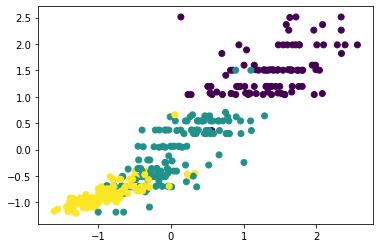

In [34]:
plt.scatter(cars_sc['wt'], cars_sc['disp'], c=cars_sc.labels)

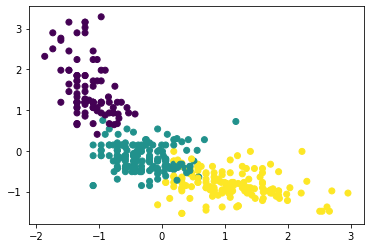

In [35]:
plt.scatter(cars_sc['mpg'], cars_sc['hp'], c=cars_sc.labels)

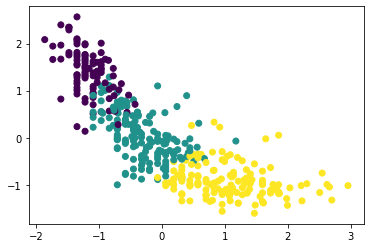

In [36]:
plt.scatter(cars_sc['mpg'], cars_sc['wt'], c=cars_sc.labels)

#### From above scatter plots, the clustering seem to be optimal and balanced

## Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

For Linear Regression, considering disp, hp, acc, wt and acc as independent variables and mpg as predicted variable.

X = disp, hp. wt, acc

y = mpg

In [37]:
groups = range(0, 3)

In [38]:
print(list(cars_sc.columns))
for ii in groups:
    group = cars_sc.loc[cars_sc['labels'] == ii]
    X = group.drop(labels=['labels', 'mpg'], axis=1)
    y = group['mpg']
    lgm = LinearRegression().fit(X, y)
    print('Coefficients of Linear Regression Model for Cluster', ii, ':', lgm.coef_)

['disp', 'hp', 'wt', 'acc', 'mpg', 'labels']
Coefficients of Linear Regression Model for Cluster 0 : [ 0.02577889 -0.17579201 -0.1932779  -0.07987631]
Coefficients of Linear Regression Model for Cluster 1 : [-0.16556882  0.04442724 -0.25243815 -0.03003795]
Coefficients of Linear Regression Model for Cluster 2 : [ 0.33883581 -0.61307928 -0.26899952 -0.03405713]


#### From the coefficients of Linear Regressions for all clusters:
- Difference in coefficients of disp and hp are significant across clusters
- Difference in coefficients of wt is not significant acrss clusters (compared to disp and hp)
- The value of coefficients of acc is very low for all clusters; which means acc is not much contributing to clustering

### The observations from EDA, K-Means Model and Linear Regression coefficients produce identical inferences on Clustering. The 3 Clusters as modeled above seem to be an optimal and balanced solution for the given dataset 

In [42]:
print('Cluster Error with 3 Clusters excluding cyl and yr:', cluster_error[2])

Cluster Error with 3 Clusters excluding cyl and yr: 572.5347048342567


# Note: I have performed the clustering including yr, scaling it and using it for Clustering and Linear Regression.

# It gives 4 optimal Clusters with Cluster error of 742. The Scatter plots for few variables also show good amount of overlap and doesn't look like the optimal solution

# So, I believe, 3 Clusters omiting cyl and yr seemed to be an optimal clustering solution (with error 572)